In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
data = pd.read_csv(r'fdc69852-9edd-445f-9c9a-f516b3ad5e5c.csv', delimiter = ';')

In [ ]:
data[data["product"] == "KELP"]

AttributeError: 'Series' object has no attribute 'unqiue'

    price  volume side
3  2029.0    31.0  ask
0  2028.0     1.0  bid
1  2026.0     2.0  bid
2  2025.0    29.0  bid


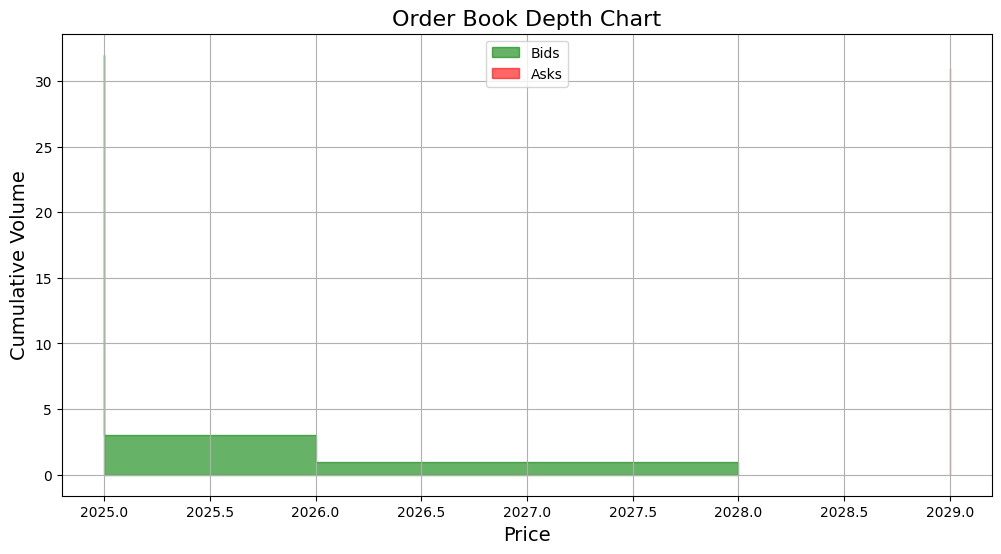

In [ ]:
def order_book(data):
    data = data[data["product"] == "KELP"]
    order_book = []
    # print(data["bid_price_1"].unique())
    for index, row in data.iterrows():
        # Bid data (buy side)
        # t = []
        for i in range(1, 4): # 3 levels of bids
            bid_price = row[f"bid_price_{i}"]
            bid_volume = row[f"bid_volume_{i}"]
            # t.append((bid_price, bid_volume))

            if bid_price > 0 and bid_volume > 0:
                order_book.append({"price": bid_price, "volume": bid_volume, "side": "bid"})
        # print(t)

        # Ask data (sell side)
        for i in range(1, 4): # 3 levels of asks
            ask_price = row[f"ask_price_{i}"]
            ask_volume = row[f"ask_volume_{i}"]
            if ask_price > 0 and ask_volume > 0:
                order_book.append({'price': ask_price, 'volume': ask_volume, 'side': 'ask'})

        order_book_df = pd.DataFrame(order_book)

        # Sorting: Bids (descending), Asks (ascending)
        order_book_df.sort_values(by=['side', 'price'], ascending=[True, False], inplace=True)
        print(order_book_df.head(100))

        return order_book_df

def plot_order_book(order_book_df):
    # Separate bids and asks
    bids = order_book_df[order_book_df['side'] == 'bid'].sort_values(by='price', ascending=False)
    asks = order_book_df[order_book_df['side'] == 'ask'].sort_values(by='price', ascending=True)

    # Compute cumulative volume for a realistic order book effect
    bids['cumulative_volume'] = bids['volume'].cumsum()
    asks['cumulative_volume'] = asks['volume'].cumsum()

    # Set up the plot
    plt.figure(figsize=(12,6))
    
    # Plot bid side (green)
    plt.fill_between(bids['price'], bids['cumulative_volume'], color='green', alpha=0.6, step='post', label="Bids")

    # Plot ask side (red)
    plt.fill_between(asks['price'], asks['cumulative_volume'], color='red', alpha=0.6, step='post', label="Asks")

    # Labels and formatting
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Cumulative Volume', fontsize=14)
    plt.title('Order Book Depth Chart', fontsize=16)
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

plot_order_book(order_book(data=data))